## We have the Boston Housing Data Project here.
## The attributes used here have been taken from the dataset in kaggle.
## These attributes are used for describing a particular area, so that the houses in the said area can be appropiately priced.
1. CRIM: per capita crime rate by town
    
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
    
3. INDUS: proportion of non-retail business acres per town
    
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    
5. NOX: nitric oxides concentration (parts per 10 million)
    
6. RM: average number of rooms per dwelling
    
7. AGE: proportion of owner-occupied units built prior to 1940
    
8. DIS: weighted distances to five Boston employment centers
    
9. RAD: index of accessibility to radial highways
    
10. TAX: full-value property-tax rate per $10,000
    
11. PTRATIO: pupil-teacher ratio by town
    
12. B: 1000(Bk 􀀀 0:63)2 where Bk is the proportion of blacks by town
    
13. LSTAT: % lower status of the population
    
14. MEDV: Median value of owner-occupied homes in $1000s
    

In [1]:
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [2]:
## We import the data now.
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, delim_whitespace=True,names=names)

### Brief Look at Our Data


In [3]:
print(dataset.shape)

(506, 14)


In [4]:
print(dataset.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [5]:
dataset.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [6]:
set_option('precision',1)
print(dataset.describe())

          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD  \
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0   
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5   
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7   
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0   
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0   
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0   
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0   
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0   

         TAX  PTRATIO      B  LSTAT   MEDV  
count  506.0    506.0  506.0  506.0  506.0  
mean   408.2     18.5  356.7   12.7   22.5  
std    168.5      2.2   91.3    7.1    9.2  
min    187.0     12.6    0.3    1.7    5.0  
25%    279.0     17.4  375.4    6.9   17.0  
50%    330.0     19.1  391.4   11.4   21.2  


In [7]:
## Now we will check the correlation b/w the different variables.
set_option('precision',2)
print(dataset.corr(method='pearson'))


         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
PTRATIO  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.39  0.18  -0.36  4.88e-02 -0.

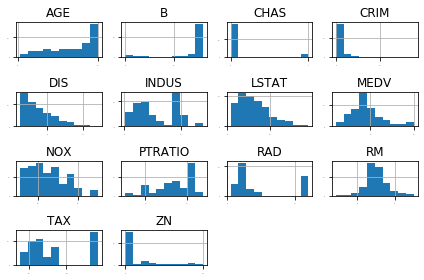

In [8]:
# Let's construct graphs and plots to better understand the data.
import matplotlib.pyplot as plt
dataset.hist(sharex=False, sharey= False, xlabelsize=1, ylabelsize = 1)
plt.tight_layout()
pyplot.show()
## Histogram

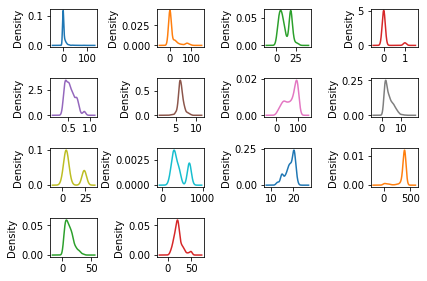

In [9]:
# Density Plots
dataset.plot(kind='density',subplots=True,layout=(4,4),sharex=False,legend=False)
fontsize=1
plt.tight_layout()
pyplot.show()

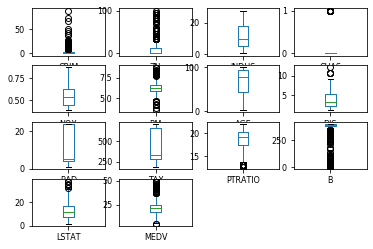

In [10]:
# Box and Whisker Plots
dataset.plot(kind='box',subplots=True,layout=(4,4),sharex=False,sharey=False,fontsize = 8)
pyplot.show()

In [11]:
## We can see here that most of the data is not normally
#distributed. The points have a lot of outliers.

## How do we read the scatter Plot Matrix
# Doubt

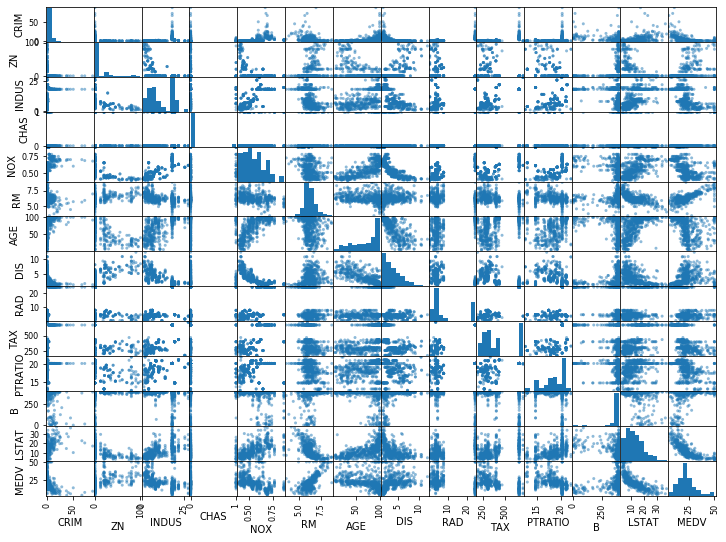

In [12]:
## Now let us look at the interactions b/w different variables.
## Scatter Plot Matrix
fig_size = pyplot.rcParams['figure.figsize']
fig_size[0]=12
fig_size[1]=9
pyplot.rcParams['figure.figsize']=fig_size
scatter_matrix(dataset)
pyplot.show()

## Visualizing correlations b/w different variables.

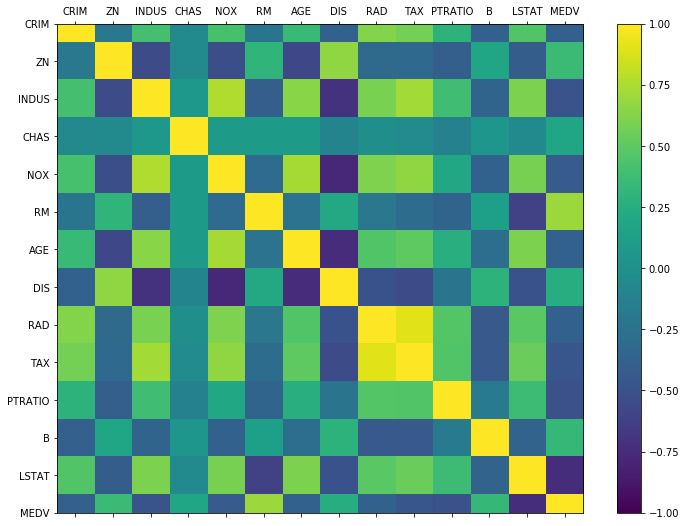

In [13]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(),vmin=-1,vmax=1,interpolation='none')
# what is interpolation in correlation matrix?
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

In [14]:
## We can observe here that some of the variables here are both positively and negatively correlated.These will,
## have to be removed for better accuracy.

##### From the observed figures and the facts from the data data description we can see that the data needs to be worked on so that wrong solutions can be avoided.

* We need to do feature selection due to correlated attributes.
* We need to normalize the dataset because most of the variables are skewed, have outliers, have bimodal or exponential distributions etc.

###### Now we divide the dataset in training part and the validation part.
###### We will be using only the training dataset to perform all the actions and for creating our model.
###### We will be using the validation part to analyze our dataset.

In [15]:
# Splitting dataset in validation and training set.
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train,X_validation,Y_train,Y_validation=train_test_split(X,Y,test_size=validation_size,random_state=seed)

#### Since we do not know which algorithm will work perfectly, we will use all the available regression algorithms to check which algorithm will perform good on this dataset.This is called spot checking of the algorithms.
#### We will evaluate our model using the MSE metric.

In [16]:
num_folds=10
seed = 7
scoring = 'neg_mean_squared_error'

#### When we spot check our algorithms we will use the following algorithms.

###### Linear Algorithms
* Linear Regression(LR)
* Lasso Regression
* Elastic Net

###### Non-Linear Algorithms
* Classification and Regression Trees
* Support Vector Regression
* K-Nearest Neighbors

# Are we trying to minimize the MSE here or are we trying to enhance the performance of the model? FML


In [17]:
from sklearn.tree import DecisionTreeRegressor
models = []
models.append(('LR',LinearRegression()))
models.append(('Lasso',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('SVR',SVR()))

In [18]:
# The parameters for the above mentioned algorithms 
# have default values.
results=[]
names=[]
for name, model in models:
    kfold = KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

C:\Users\Prakhar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: -21.379856 (9.414264)
Lasso: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
CART: -25.163734 (11.985279)
KNN: -41.896488 (13.901688)


C:\Users\Prakhar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Prakhar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Prakhar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Prakhar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffl

SVR: -67.827886 (29.049138)


In [19]:
## Since we are evaluating the algorithms on the basis
## of MSE, we observe here that LR has the least amount
## error.

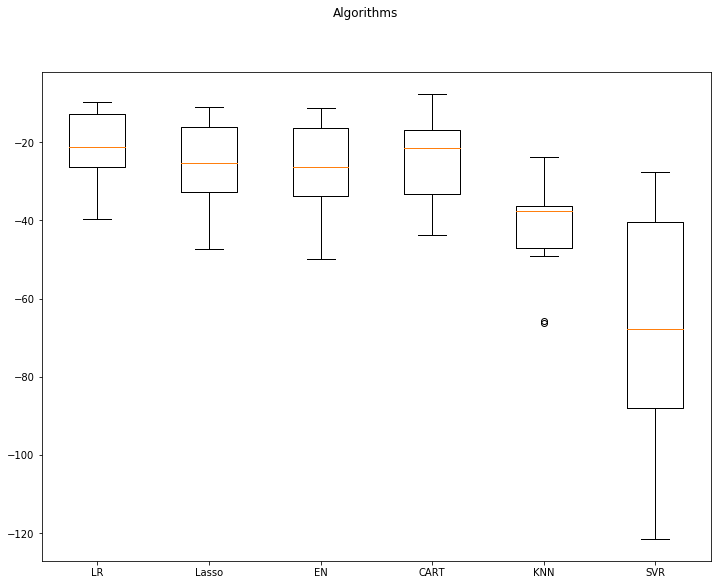

In [20]:
## Now we will observe our results visually, to 
## understand the distribution of our results.
fig = pyplot.figure()
fig.suptitle("Algorithms")
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [21]:
# Here , we observe that most of the algorithms perform substandardly. Now, we will check the algorithms on standardized data. Since most of the variables have varying means and standard deviations, it is affecting the final 
# result of the algorithms.
# When we standardize the data the data will have a mean of 0, and standard deviation of 1.
# We would also like to avoid data leakage, hence we will be using pipelines to design our test-harness.

In [22]:
pipelines=[]
pipelines.append(('ScaledLR',Pipeline([('Scaler',StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('Scaled Lasso',Pipeline([('Scaler',StandardScaler()),('Lasso',Lasso())])))
pipelines.append(("Scaled EN",Pipeline([('Scaler',StandardScaler()),('ElasticNet',ElasticNet())])))
pipelines.append(('Scaled CART',Pipeline([('Scaler',StandardScaler()),('Cart',DecisionTreeRegressor())])))
pipelines.append(('Scaled KNN',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('Scaled SVR',Pipeline([('Scaler',StandardScaler()),('SVR',SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

C:\Users\Prakhar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Prakhar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Prakhar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Prakhar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffl

ScaledLR: -21.379856 (9.414264)
Scaled Lasso: -26.607314 (8.978761)
Scaled EN: -27.932372 (10.587490)
Scaled CART: -24.047535 (11.396655)


C:\Users\Prakhar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Prakhar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Scaled KNN: -20.107620 (12.376949)
Scaled SVR: -29.633086 (17.009186)


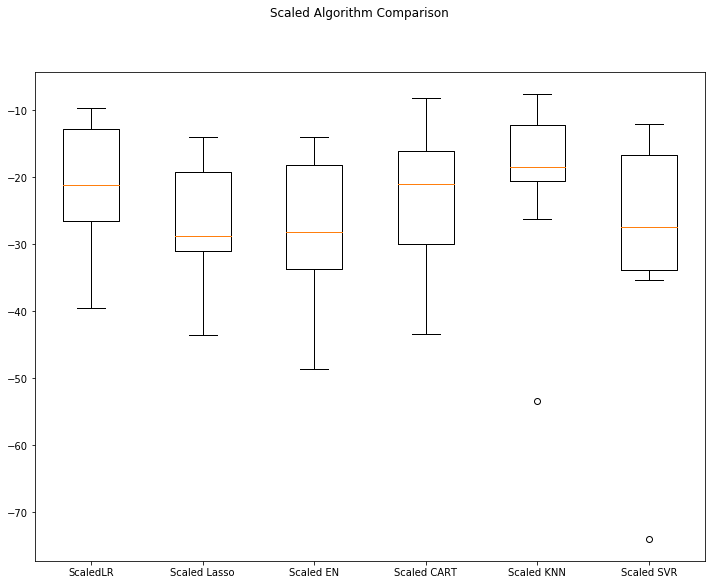

In [23]:
## Visual Comparing of Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [24]:
## We can see here that KNN has the tightest distribution and the least error.
## We can increase the performance of the algorithm by tuning the hyperparameters of the algorithm.

In [25]:
# We will us ethe grid search cv for determining the best number of neighbors which can be used for enhancing the performance of the model.
# We will be deciding the values of k b/w 7 to 21.
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model= KNeighborsRegressor()
kfold = KFold(n_splits=num_folds,random_state=seed)
grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result = grid.fit(rescaledX,Y_train)

C:\Users\Prakhar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [26]:
print("Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means,stds,params):
    print("%f (%f) with: %r" % (mean,stdev,param))

# Here we are trying to reduce the amount of error in KNN.
# Here the best  number of k=3 i.e it gives the least error.

Best: -18.109304 using {'n_neighbors': 3}
-20.169640 (14.986904) with: {'n_neighbors': 1}
-18.109304 (12.880861) with: {'n_neighbors': 3}
-20.063115 (12.138331) with: {'n_neighbors': 5}
-20.514297 (12.278136) with: {'n_neighbors': 7}
-20.319536 (11.554509) with: {'n_neighbors': 9}
-20.963145 (11.540907) with: {'n_neighbors': 11}
-21.099040 (11.870962) with: {'n_neighbors': 13}
-21.506843 (11.468311) with: {'n_neighbors': 15}
-22.739137 (11.499596) with: {'n_neighbors': 17}
-23.829011 (11.277558) with: {'n_neighbors': 19}
-24.320892 (11.849667) with: {'n_neighbors': 21}


#### Now we will use ensembling methods to further boost performance of our model.

##### Ensembling methods are of two types :
* Boosting: AdaBoost,Gradient Boosting(GBM)
* Bagging: Random Forests, Extra Trees


In [27]:
ensembles = []
ensembles.append(('ScaledAB',Pipeline([('Scaler',StandardScaler()),('AB',AdaBoostRegressor())])))
ensembles.append(('ScaledGBM',Pipeline([('Scaler',StandardScaler()),('GBM',GradientBoostingRegressor())])))
ensembles.append(('ScaledRF',Pipeline([('Scaler',StandardScaler()),('RF',RandomForestRegressor())])))
ensembles.append(('ScaledET',Pipeline([('Scaler',StandardScaler()),('ET',ExtraTreesRegressor())])))
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds,random_state=seed)
    cv_results = cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

C:\Users\Prakhar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Prakhar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Prakhar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Prakhar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffl

LR: -21.379856 (9.414264)
Lasso: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
CART: -24.263351 (9.678711)


C:\Users\Prakhar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Prakhar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: -41.896488 (13.901688)
SVR: -67.827886 (29.049138)


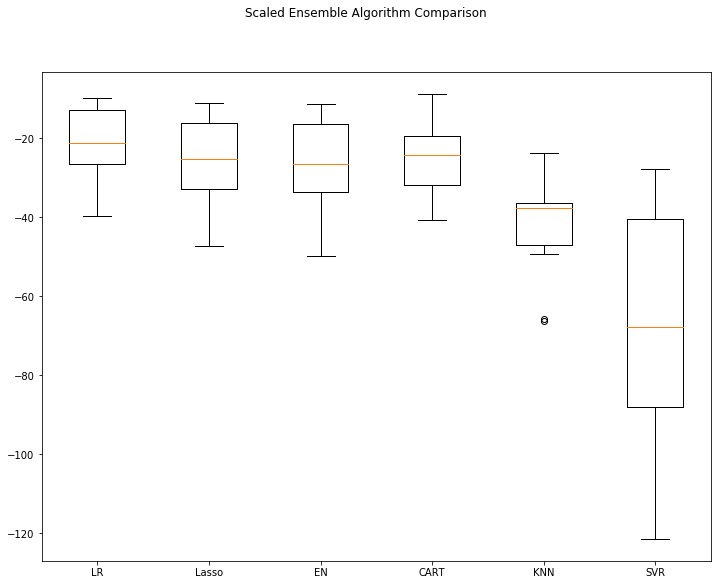

In [28]:
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


### To further boost the performance of our model, we will be tuning the hyper parameters of our model.

In [ ]:
# Tuning the Scaled GBM model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds,random_state=seed)
grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result = grid.fit(rescaledX,Y_train)

C:\Users\Prakhar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_))
mean = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean, stdev , param in zip(mean,stds,params):
    print("%f(%f) with: %r" % (mean,stdev,param))